In [1]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
##from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
##import pydotplus

In [2]:
df = pd.read_csv("/Users/ekcs011/Downloads/Decision tree/winequality_red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [45]:
ProfileReport(df)

NameError: name 'ProfileReport' is not defined

In [46]:
x=df.drop(columns=['quality'])

In [47]:
y = df['quality']

In [48]:
train_test_split(x,y,test_size = .25, random_state=30)

[      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 1178            5.6             0.915         0.00             2.1      0.041   
 1189            8.8             0.955         0.05             1.8      0.075   
 161             7.6             0.680         0.02             1.3      0.072   
 109             8.1             0.785         0.52             2.0      0.122   
 961             7.1             0.560         0.14             1.6      0.078   
 ...             ...               ...          ...             ...        ...   
 919             8.4             0.620         0.12             1.8      0.072   
 1164            9.0             0.785         0.24             1.7      0.078   
 500             7.8             0.520         0.25             1.9      0.081   
 941             9.9             0.270         0.49             5.0      0.082   
 421             6.6             0.840         0.03             2.3      0.059   
 
       free su

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state= 355)

In [50]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
dt_model= DecisionTreeClassifier()

In [52]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [53]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
df1 = df.head(500)

In [55]:
x1 = df1.drop(columns='quality')

In [56]:
y1 = df1.quality

In [57]:
dt_model1= DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

In [58]:
import matplotlib.pyplot as plt

In [59]:
set(y1)

{3, 4, 5, 6, 7, 8}

In [60]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8
496,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.9984,3.43,0.65,9.0,6
497,7.2,0.34,0.32,2.5,0.090,43.0,113.0,0.9966,3.32,0.79,11.1,5
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8


[Text(491.1031192870201, 1057.0, 'X[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(305.3953382084095, 996.6, 'X[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(192.54570383912247, 936.2, 'X[2] <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(91.2998171846435, 875.8, 'X[10] <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]'),
 Text(32.643510054844604, 815.4000000000001, 'X[9] <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]'),
 Text(24.482632541133455, 755.0, 'X[9] <= 0.515\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]'),
 Text(16.321755027422302, 694.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(32.643510054844604, 694.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(40.804387568555754, 755.0, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0, 0]'),
 Text(149.9561243144424, 815.4000000000001, 'X[7] <= 0.999\ngini = 

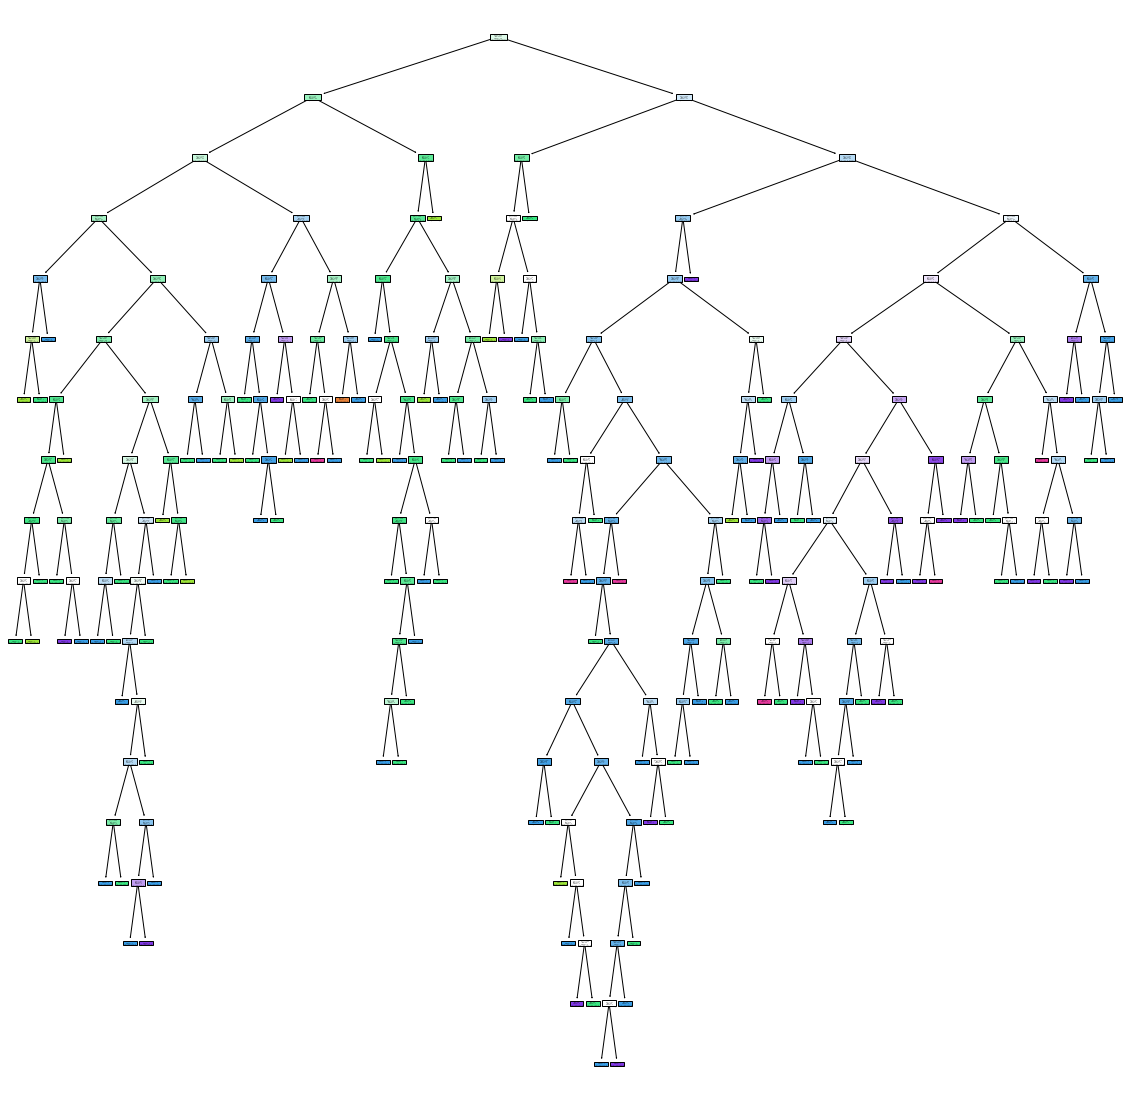

In [61]:
plt.figure(figsize=(20,20))

tree.plot_tree(dt_model1,filled=True)


In [62]:
dt_model1.predict(x1)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       7, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5,
       5, 7, 4, 8, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6,

In [63]:
dt_model1.score(x1,y1)

1.0

In [64]:
dt_model1.score(x_test,y_test)

0.6229166666666667

In [65]:
path  = dt_model1.cost_complexity_pruning_path(x1,y1)
ccp_alpha = path['ccp_alphas']

In [66]:
ccp_alpha

array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
       0.00188235, 0.00192308, 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.00247552, 0.00261111, 0.00262769, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00272222, 0.00283333,
       0.003     , 0.003     , 0.003     , 0.003     , 0.00304762,
       0.00304762, 0.00305051, 0.00308418, 0.00328205, 0.00333333,
       0.00333333, 0.00334032, 0.00336606, 0.00342857, 0.00343316,
       0.0035    , 0.0035    , 0.0036    , 0.00363636, 0.00373333,
       0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
       0.00428571, 0.00428571, 0.00437662, 0.00462338, 0.00465709,
       0.00466667, 0.0048    , 0.00487179, 0.00504242, 0.00508235,
       0.00509091, 0.00510606, 0.00516667, 0.00568485, 0.00589394,
       0.00656364, 0.00671079, 0.0067591 , 0.00688352, 0.00688

In [67]:
dt_model2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)

In [68]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.0018500000000000005),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.0024755244755244737),
 DecisionTreeClassifier(ccp_alpha=0.0026111111111111114),
 DecisionTreeClassifier(ccp_alpha=0.0026276923076923083),
 DecisionTreeClassifier(ccp_alpha=0.0026666666666666666),
 DecisionTreeClassifier(ccp_al

In [69]:
path

{'ccp_alphas': array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
        0.00188235, 0.00192308, 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
        0.002     , 0.00247552, 0.00261111, 0.00262769, 0.00266667,
        0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
        0.00266667, 0.00266667, 0.00266667, 0.00272222, 0.00283333,
        0.003     , 0.003     , 0.003     , 0.003     , 0.00304762,
        0.00304762, 0.00305051, 0.00308418, 0.00328205, 0.00333333,
        0.00333333, 0.00334032, 0.00336606, 0.00342857, 0.00343316,
        0.0035    , 0.0035    , 0.0036    , 0.00363636, 0.00373333,
        0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
        0.00428571, 0.00428571, 0.00437662, 0.00462338, 0.00465709,
        0.00466667, 0.0048    , 0.00487179, 0.00504242, 0.00508235,
        0.00509091, 0.00510606, 0.00516667, 0.00568485, 0.00589394,
        0.00656364, 0.00671079, 0.

In [71]:
train_score = dt_model1.score(x1,y1) for 

SyntaxError: invalid syntax (<ipython-input-71-0ec8a64e3736>, line 1)

In [72]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.0018500000000000005),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.0024755244755244737),
 DecisionTreeClassifier(ccp_alpha=0.0026111111111111114),
 DecisionTreeClassifier(ccp_alpha=0.0026276923076923083),
 DecisionTreeClassifier(ccp_alpha=0.0026666666666666666),
 DecisionTreeClassifier(ccp_al

In [73]:
train_score = [i.score(x1,y1) for i in dt_model2]

In [74]:
test_score = [i.score(x_test,y_test) for i in dt_model2]

In [75]:
test_score

[0.5979166666666667,
 0.6145833333333334,
 0.5854166666666667,
 0.5979166666666667,
 0.6083333333333333,
 0.6208333333333333,
 0.60625,
 0.6041666666666666,
 0.6145833333333334,
 0.59375,
 0.5916666666666667,
 0.6125,
 0.61875,
 0.60625,
 0.6104166666666667,
 0.6,
 0.6083333333333333,
 0.6041666666666666,
 0.6270833333333333,
 0.6041666666666666,
 0.6083333333333333,
 0.6104166666666667,
 0.6,
 0.6229166666666667,
 0.6270833333333333,
 0.6145833333333334,
 0.6104166666666667,
 0.5979166666666667,
 0.6229166666666667,
 0.6041666666666666,
 0.6020833333333333,
 0.60625,
 0.6083333333333333,
 0.5979166666666667,
 0.6083333333333333,
 0.6083333333333333,
 0.6,
 0.5958333333333333,
 0.6104166666666667,
 0.6020833333333333,
 0.6104166666666667,
 0.6,
 0.5979166666666667,
 0.6041666666666666,
 0.6145833333333334,
 0.6,
 0.5958333333333333,
 0.6083333333333333,
 0.5979166666666667,
 0.6104166666666667,
 0.60625,
 0.6083333333333333,
 0.6104166666666667,
 0.6,
 0.6125,
 0.6041666666666666,
 0.6

In [76]:
dt_model_ccp = DecisionTreeClassifier(random_state=0,ccp_alpha=.014)
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

In [77]:
dt_model_ccp

DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

[Text(558.0, 906.0, 'X[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(279.0, 543.6, 'X[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(139.5, 181.19999999999993, 'gini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(418.5, 181.19999999999993, 'gini = 0.271\nsamples = 90\nvalue = [0, 3, 76, 11, 0, 0]'),
 Text(837.0, 543.6, 'X[9] <= 0.545\ngini = 0.657\nsamples = 241\nvalue = [0, 4, 72, 112, 46, 7]'),
 Text(697.5, 181.19999999999993, 'gini = 0.408\nsamples = 32\nvalue = [0, 2, 24, 5, 1, 0]'),
 Text(976.5, 181.19999999999993, 'gini = 0.638\nsamples = 209\nvalue = [0, 2, 48, 107, 45, 7]')]

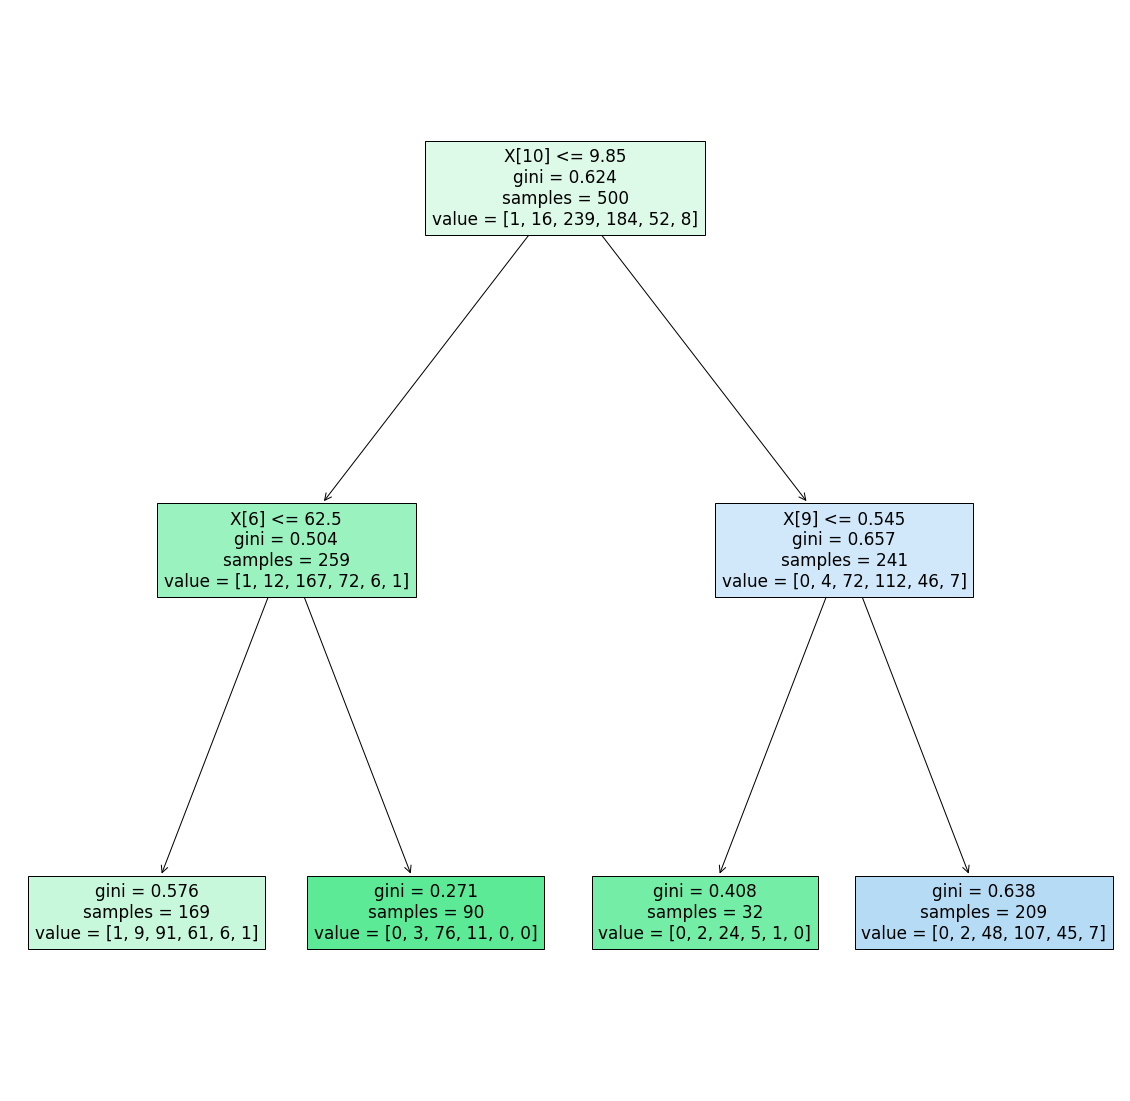

In [78]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [79]:
dt_model_ccp.score(x1,y1)

0.596

In [80]:
dt_model_ccp.score(x_test,y_test)

0.5708333333333333

In [81]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [82]:
grid_pram = {"criterion":['gini','entropy'],
    "splitter":['best','random'],
             "max_depth":range(2,40,1),
             "min_samples_split":range(2,10,1),
             "min_samples_leaf":range(1,10,1)
    

}

In [83]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram,cv=5,n_jobs=-1)

In [84]:
grid_ccp.fit(x1,y1)

/Users/ekcs011/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.014, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [85]:
grid_ccp.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [86]:
dt_cpp_new = DecisionTreeClassifier(criterion='entropy',max_depth=17,min_samples_leaf= 1,min_samples_split= 3,splitter= 'random')

In [87]:
dt_cpp_new.fit(x1,y1)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_split=3,
                       splitter='random')

In [88]:
dt_cpp_new.score(x_train,y_train)

0.5710455764075067

In [89]:
dt_cpp_new.score(x_test,y_test)

0.6479166666666667

In [90]:
pred = dt_cpp_new.predict(x_train)

In [91]:
confusion_matrix(y_train,pred)

array([[  2,   1,   4,   1,   0,   0],
       [  1,  10,   9,   8,   7,   1],
       [  4,  13, 306, 129,  15,   1],
       [  3,  11, 114, 253,  50,  15],
       [  0,   6,  27,  33,  60,  19],
       [  0,   0,   5,   2,   1,   8]])

In [93]:
x = df.drop(columns=['quality'])

In [94]:
y = df.quality